<a href="https://colab.research.google.com/github/Vishaal-batcoderda/Linear_Regression_Health_Costs_Calculator_-Optimized-/blob/main/Linear_Regression_Health_Costs_Calculator_(Optimized).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

  Preparing metadata (setup.py) ... done


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2026-01-03 05:00:24--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2026-01-03 05:00:25 (66.9 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert all categorical columns (like sex, smoker, region) to numerical values using one hot encoding
dataset = pd.get_dummies(dataset).astype(float)
# Split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
dataset.tail()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50.0,31.0,3.0,10600.55,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.9,0.0,2205.98,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.9,0.0,1629.83,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.8,0.0,2007.95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1337,61.0,29.1,0.0,29141.36,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df = train_dataset.copy()
df_test = test_dataset.copy()

#Added polynomial features so that non-linearity can be captured correctly

# bmi * smoker_yes
df['bmi_smoker'] = df['bmi'] * df['smoker_yes']
df_test['bmi_smoker'] = df_test['bmi'] * df_test['smoker_yes']

# age * smoker_yes
df['age_smoker'] = df['age'] * df['smoker_yes']
df_test['age_smoker'] = df_test['age'] * df_test['smoker_yes']

X_train = df.values
y_train = train_labels.values

X_test = df_test.values
y_test = test_labels.values

# This just scales the data such that all values are centered around 0 — helps the model train better

mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

def normalize(x):
    return (x - mu) / sigma

X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
m,n = X_train.shape
w = np.zeros(n)
b = 0
alpha = 0.01
num_iters = 6000
lambda_ = 0.1

In [ ]:
def predict(X,w,b):
  return np.dot(X,w) + b

In [ ]:
def compute_cost(X,y,w,b,lambda_):
  cost = 0
  reg_cost = 0
  m,n = X.shape
  for i in range(m):
    y_hat = np.dot(X,w) + b
    cost += (y_hat[i] - y[i])**2
  cost = cost/(2*m)
  for j in range(n):
    reg_cost += (lambda_ / (2*m)) * (w[j]**2)
  return cost + reg_cost

In [ ]:
def compute_gradient(X,y,w,b,lambda_):
  m,n = X.shape
  dj_dw = np.zeros(n)
  dj_db = 0
  for i in range(m):
    y_hat = np.dot(X,w) + b
    dj_dw += (y_hat[i] - y[i])*X[i]
    dj_db += (y_hat[i] - y[i])

  dj_dw = (dj_dw/m) + (lambda_ / m)*w
  dj_db /= m
  return dj_dw,dj_db

In [ ]:
def gradient_descent(X, y, w, b, alpha, num_iters, lambda_):
  J_history = []
  for i in range(num_iters):
    dj_dw, dj_db = compute_gradient(X,y,w,b,lambda_)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    J_history.append(compute_cost(X, y, w, b, lambda_))
  return w,b,J_history

In [ ]:
def compute_mae(y_true, y_pred):
    m = len(y_true)
    return np.sum(np.abs(y_true - y_pred)) / m

In [ ]:
before = compute_cost(X_train,y_train,w,b,lambda_)
print("Before: ",before)

Before:  158818681.23987633


In [ ]:
w,b,J = gradient_descent(X_train,y_train,w,b,alpha,num_iters,lambda_)

In [ ]:
train_cost = compute_cost(X_train, y_train, w, b,lambda_)
predictions = predict(X_test,w,b)
after = train_cost
print("Cost Before: ",before)
print("Cost After :",after)
print("Cost reduced? :",before >= after)
print("Difference: ",before-after)
print("Cost history 1st five: ",J[:4])
print("Cost history last five: ",J[:-5:-1])

Cost Before:  158818681.23987633
Cost After : 12359440.533688108
Cost reduced? : True
Difference:  146459240.70618823
Cost history 1st five:  [np.float64(153358629.62877777), np.float64(148207603.19463974), np.float64(143344206.46287075), np.float64(138748630.38920087)]
Cost history last five:  [np.float64(12359440.533688108), np.float64(12359528.91711886), np.float64(12359617.348133747), np.float64(12359705.826758428)]


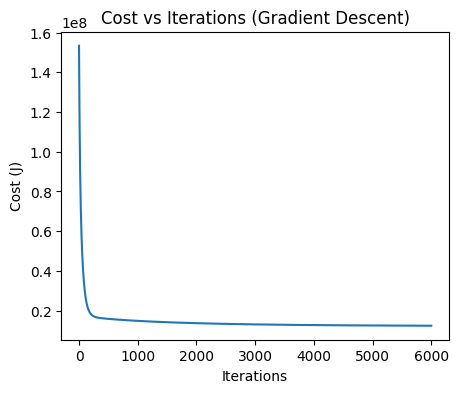

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(J)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost vs Iterations (Gradient Descent)")
plt.show()

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae = compute_mae(y_test,predictions)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

Testing set Mean Abs Error: 2859.70 expenses
You passed the challenge. Great job!


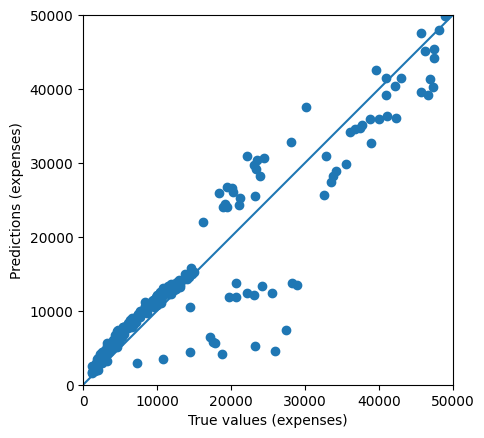

In [ ]:
# Plot predictions.
test_predictions = predict(X_test,w,b)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)